In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis_v2'

In [2]:
BaseDir = "./results/"


In [3]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)
df_toplot = selected_df

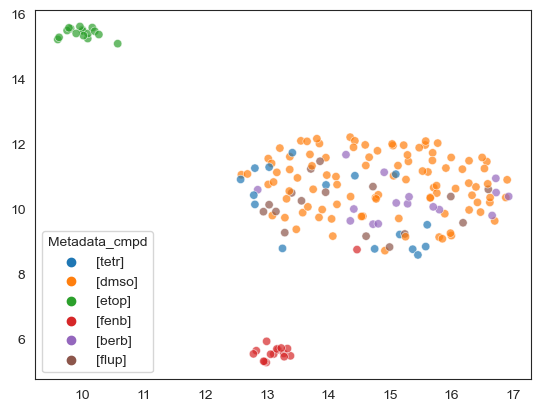

In [4]:
## UMAP
posconDf = df_toplot[df_toplot['Metadata_pert_type'] != 'trt'] # Only take positive controls
training_data = posconDf.drop(ListOfMetadata, axis=1).to_numpy()

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=posconDf.Metadata_cmpd,
    alpha=(0.7),
    marker="o",
    #legend=False
    )
